<a href="https://colab.research.google.com/github/Arucaden/PCVK-2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Daffa Maulana Satria

Kelas : TI - 3D

NIM   : 2241720105


---



In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
from math import log10, sqrt

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 50


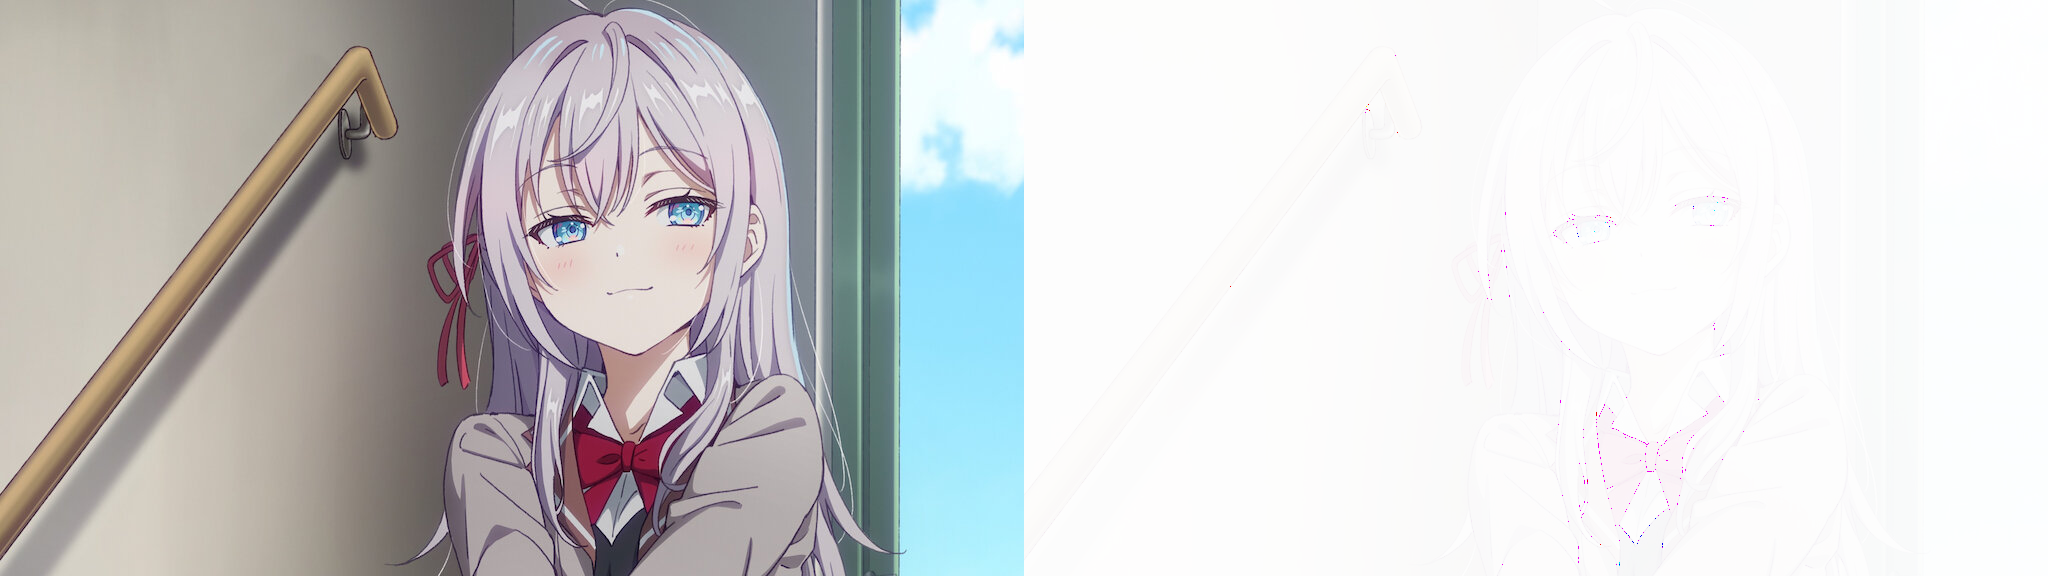

In [6]:
print('Gamma Correction pada citra')
print('----------------------------------')

# Meminta masukan nilai gamma dari pengguna
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0  # Default nilai gamma

# Fungsi untuk melakukan gamma correction
def gamma_correction(image, gamma_value):
    # Buat lookup table untuk setiap nilai intensitas
    inv_gamma = 1.0 / gamma_value
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(256)]).astype(np.uint8)
    # Menerapkan gamma correction menggunakan lookup table
    return cv2.LUT(image, table)

# Membaca gambar (path ke gambar bisa disesuaikan)
image_path = 'image1.png'
image = cv2.imread(image_path)
if image is None:
    print("Error: Image not found.")
else:
    # Melakukan gamma correction
    corrected_image = gamma_correction(image, gamma)

    # Menampilkan gambar asli dan gambar hasil gamma correction
    final_result = cv2.hconcat([image, corrected_image])

    # Untuk Colab gunakan cv2_imshow
    try:
        from google.colab.patches import cv2_imshow
        cv2_imshow(final_result)
    except ImportError:
        # Jika menggunakan sistem lokal, gunakan cv2.imshow
        cv2.imshow("Gamma Correction", final_result)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

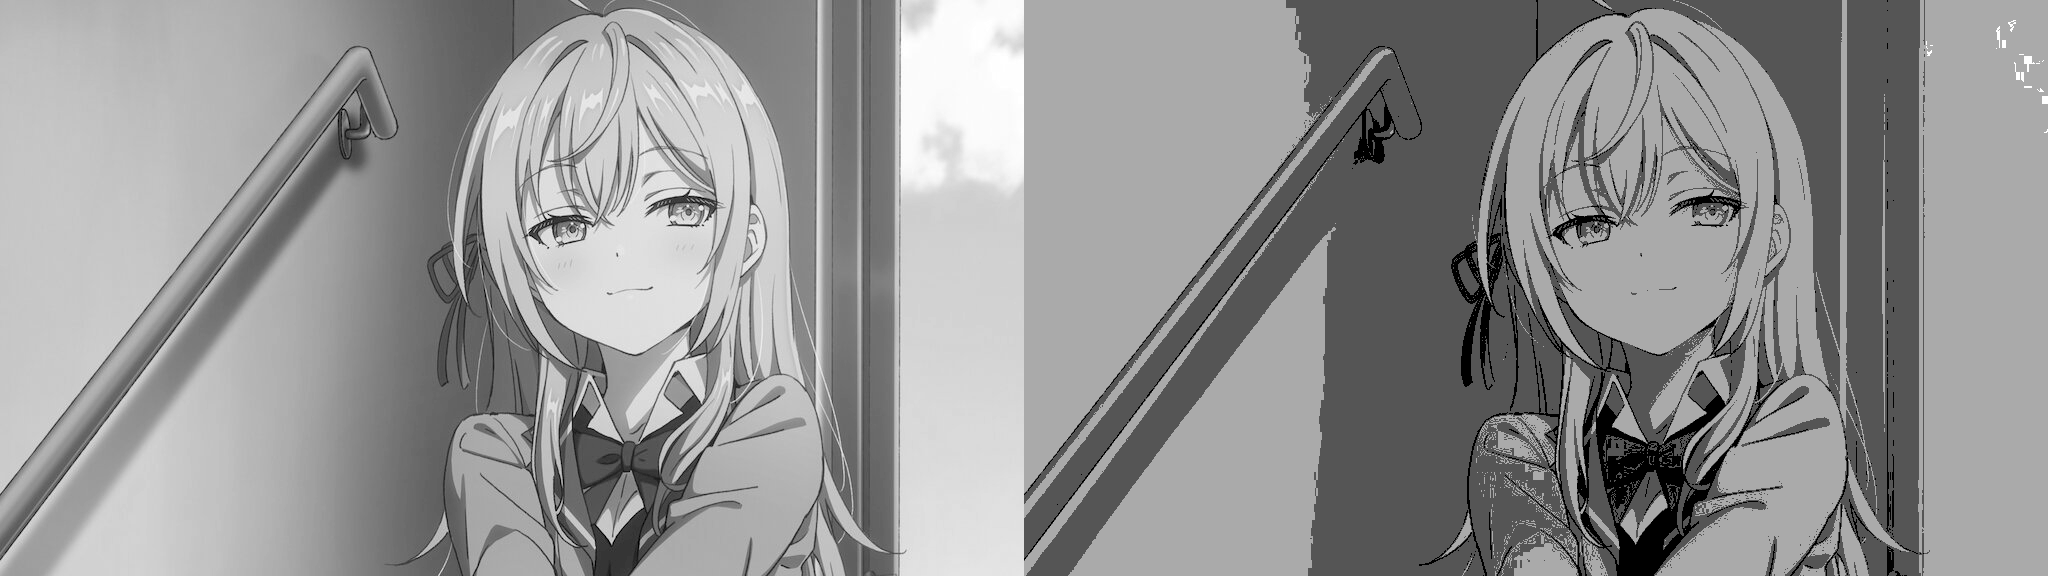

In [7]:
# Mengatur bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)  # Ini menghasilkan 85.0 untuk bit_depth = 2

# Membaca citra grayscale
original = cv2.imread('image1.png', cv2.IMREAD_GRAYSCALE)

# Memastikan citra berhasil dibaca
if original is None:
    print("Error: Citra tidak ditemukan.")
else:
    # Membuat citra dengan bit depth yang diubah
    depth_image = np.zeros(original.shape, original.dtype)

    # Mengubah citra menjadi bit depth yang ditentukan
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            depth_image[i, j] = int(original[i, j] // level) * int(level)

    # Menampilkan citra hasil
    final_result = cv2.hconcat([original, depth_image])

    # Jika menggunakan Colab, gunakan cv2_imshow
    try:
        from google.colab.patches import cv2_imshow
        cv2_imshow(final_result)
    except ImportError:
        # Jika menggunakan sistem lokal, gunakan cv2.imshow
        cv2.imshow("Bit Depth Conversion", final_result)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

PSNR untuk 5 citra noise: 27.54 dB


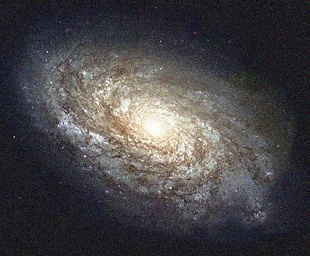

PSNR value for 5 images: 27.542229406978095 dB
Jumlah citra : 5


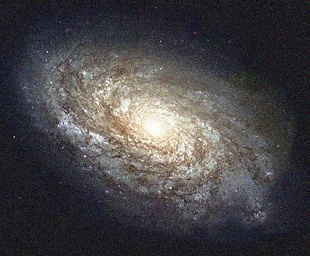

PSNR untuk 30 citra noise: 27.50 dB


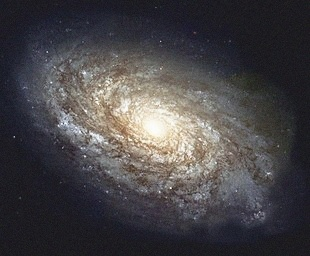

PSNR value for 30 images: 27.49576113770958 dB
Jumlah citra : 30


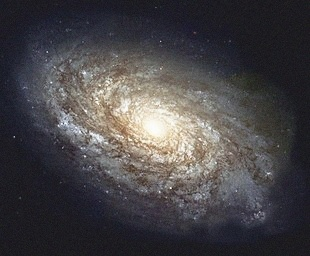

PSNR untuk 60 citra noise: 27.43 dB


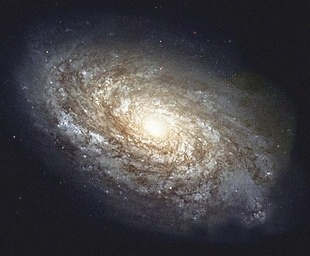

PSNR value for 60 images: 27.433006693078546 dB
Jumlah citra : 60


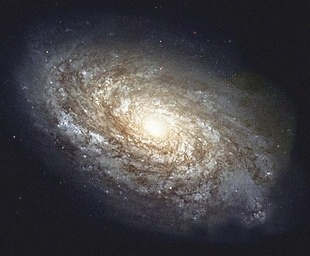

PSNR untuk 80 citra noise: 27.39 dB


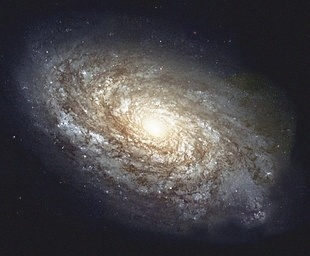

PSNR value for 80 images: 27.386874746591857 dB
Jumlah citra : 80


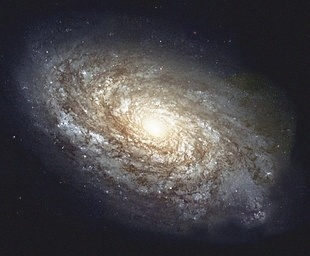

PSNR untuk 100 citra noise: 27.33 dB


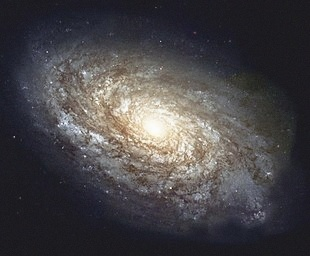

PSNR value for 100 images: 27.33439246045348 dB
Jumlah citra : 100


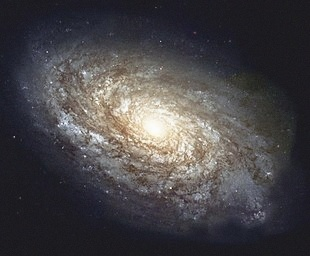

In [17]:
def average_denoising(noise_folder, output_image, num_images):
    # Membaca citra noise dari folder
    cv_img = []
    for img in glob.glob(noise_folder + '/*.jpg'):
        n = cv2.imread(img)
        if n is not None:
            # Pastikan semua citra memiliki dimensi yang sama
            if len(cv_img) > 0 and n.shape != cv_img[0].shape:
                print(f"Warning: Image {img} has a different size. Skipping this image.")
                continue
            cv_img.append(n)
        # Batasi jumlah citra yang dibaca
        if len(cv_img) >= num_images:
            break

    if len(cv_img) == 0:
        print("Error: No valid images found.")
        return

    # Menghitung rata-rata citra
    avg_image = np.mean(cv_img, axis=0).astype(np.uint8)

    # Menyimpan citra yang sudah dinyatakan bersih
    cv2.imwrite(output_image, avg_image)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca citra asli
original = cv2.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

num_images_list = [5, 30, 60, 80, 100]

# Lakukan perulangan untuk setiap jumlah citra
for num_images in num_images_list:
    output_file = f'/content/drive/MyDrive/PCVK/denoised_average_{num_images}.jpg'

    # Jalankan fungsi average_denoising
    average_denoising('/content/drive/MyDrive/PCVK/noises', output_file, num_images)

    # Membaca citra hasil denoising
    denoised_image = cv2.imread(output_file)

    # Menghitung dan mencetak PSNR antara citra asli dan citra hasil denoising
    if denoised_image is not None:
        psnr_value = PSNR(original, denoised_image)
        print(f'PSNR untuk {num_images} citra noise: {psnr_value:.2f} dB')

        # Menampilkan gambar hasil denoising
        try:
            from google.colab.patches import cv2_imshow
            cv2_imshow(denoised_image)
        except ImportError:
            cv2.imshow(f'Denoised Image - {num_images}', denoised_image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
    else:
        print(f"Hasil denoising untuk {num_images} citra tidak ditemukan.")


    # Menampilkan hasilnya
    if denoised_image is not None:
      pnsr_value = PSNR(original,denoised_image) # Pass the denoised image data t
      print(f'PSNR value for {num_images} images: {pnsr_value} dB')
      print(f'Jumlah citra : {num_images}')
      cv2_imshow(denoised_image) # Menampilkan gambar hasil denoising
    else:
      print(f"Hasil denoising untuk {num_images} citra tidak ditemukan.")

cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Gambar 5 Kelompok 9 dan 10')

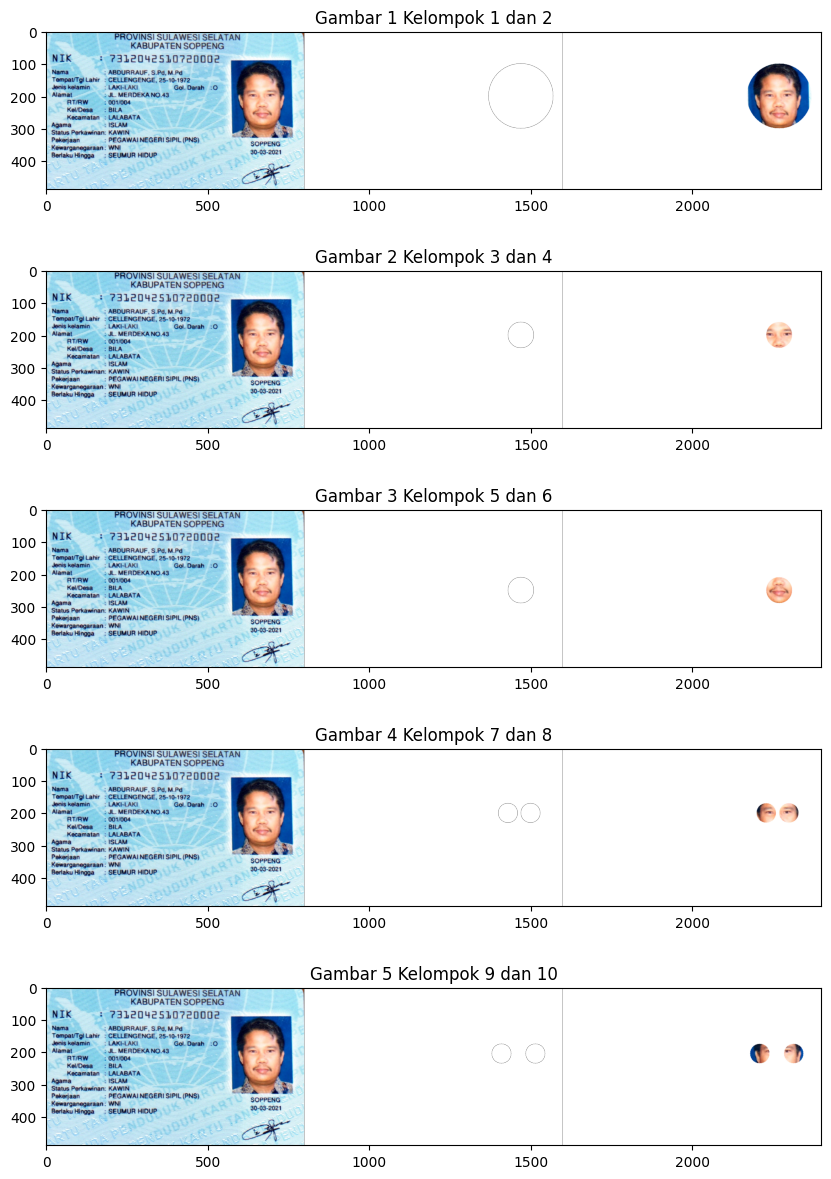

In [22]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/PCVK/KTP.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)

mask_height, mask_width, _ = image.shape
mask1 = np.zeros((mask_height, mask_width, 4), dtype=np.uint8)
mask2 = np.zeros((mask_height, mask_width, 4), dtype=np.uint8)
mask3 = np.zeros((mask_height, mask_width, 4), dtype=np.uint8)
mask4 = np.zeros((mask_height, mask_width, 4), dtype=np.uint8)
mask5 = np.zeros((mask_height, mask_width, 4), dtype=np.uint8)

cv2.circle(mask1, (670,200), 100, (255, 255, 255, 255), thickness=-1)
cv2.circle(mask2, (670,200), 40, (255, 255, 255, 255), thickness=-1)
cv2.circle(mask3, (670,250), 40, (255, 255, 255, 255), thickness=-1)
cv2.circle(mask4, (630,200), 30, (255, 255, 255, 255), thickness=-1)
cv2.circle(mask4, (700,200), 30, (255, 255, 255, 255), thickness=-1)
cv2.circle(mask5, (610,205), 30, (255, 255, 255, 255), thickness=-1)
cv2.circle(mask5, (715,205), 30, (255, 255, 255, 255), thickness=-1)

black_white_mask1 = Image.composite(Image.fromarray(mask1), Image.new("RGBA", (mask_width, mask_height), (0, 0, 0, 0)), Image.fromarray(mask1))
black_white_mask2 = Image.composite(Image.fromarray(mask2), Image.new("RGBA", (mask_width, mask_height), (0, 0, 0, 0)), Image.fromarray(mask2))
black_white_mask3 = Image.composite(Image.fromarray(mask3), Image.new("RGBA", (mask_width, mask_height), (0, 0, 0, 0)), Image.fromarray(mask3))
black_white_mask4 = Image.composite(Image.fromarray(mask4), Image.new("RGBA", (mask_width, mask_height), (0, 0, 0, 0)), Image.fromarray(mask4))
black_white_mask5 = Image.composite(Image.fromarray(mask5), Image.new("RGBA", (mask_width, mask_height), (0, 0, 0, 0)), Image.fromarray(mask5))

image_white_mask1 = Image.composite(Image.fromarray(image), Image.new("RGBA", (mask_width, mask_height), (255, 255, 255, 255)), Image.fromarray(mask1))
image_white_mask2 = Image.composite(Image.fromarray(image), Image.new("RGBA", (mask_width, mask_height), (255, 255, 255, 255)), Image.fromarray(mask2))
image_white_mask3 = Image.composite(Image.fromarray(image), Image.new("RGBA", (mask_width, mask_height), (255, 255, 255, 255)), Image.fromarray(mask3))
image_white_mask4 = Image.composite(Image.fromarray(image), Image.new("RGBA", (mask_width, mask_height), (255, 255, 255, 255)), Image.fromarray(mask4))
image_white_mask5 = Image.composite(Image.fromarray(image), Image.new("RGBA", (mask_width, mask_height), (255, 255, 255, 255)), Image.fromarray(mask5))

final_frame1 = cv2.hconcat([image, np.array(black_white_mask1), np.array(image_white_mask1)])
final_frame2 = cv2.hconcat([image, np.array(black_white_mask2), np.array(image_white_mask2)])
final_frame3 = cv2.hconcat([image, np.array(black_white_mask3), np.array(image_white_mask3)])
final_frame4 = cv2.hconcat([image, np.array(black_white_mask4), np.array(image_white_mask4)])
final_frame5 = cv2.hconcat([image, np.array(black_white_mask5), np.array(image_white_mask5)])

plt.figure(figsize=(10, 15))
plt.subplot(5,1,1)
plt.imshow(final_frame1)
plt.title('Gambar 1 Kelompok 1 dan 2')
plt.subplot(5,1,2)
plt.imshow(final_frame2)
plt.title('Gambar 2 Kelompok 3 dan 4')
plt.subplot(5,1,3)
plt.imshow(final_frame3)
plt.title('Gambar 3 Kelompok 5 dan 6')
plt.subplot(5,1,4)
plt.imshow(final_frame4)
plt.title('Gambar 4 Kelompok 7 dan 8')
plt.subplot(5,1,5)
plt.imshow(final_frame5)
plt.title('Gambar 5 Kelompok 9 dan 10')

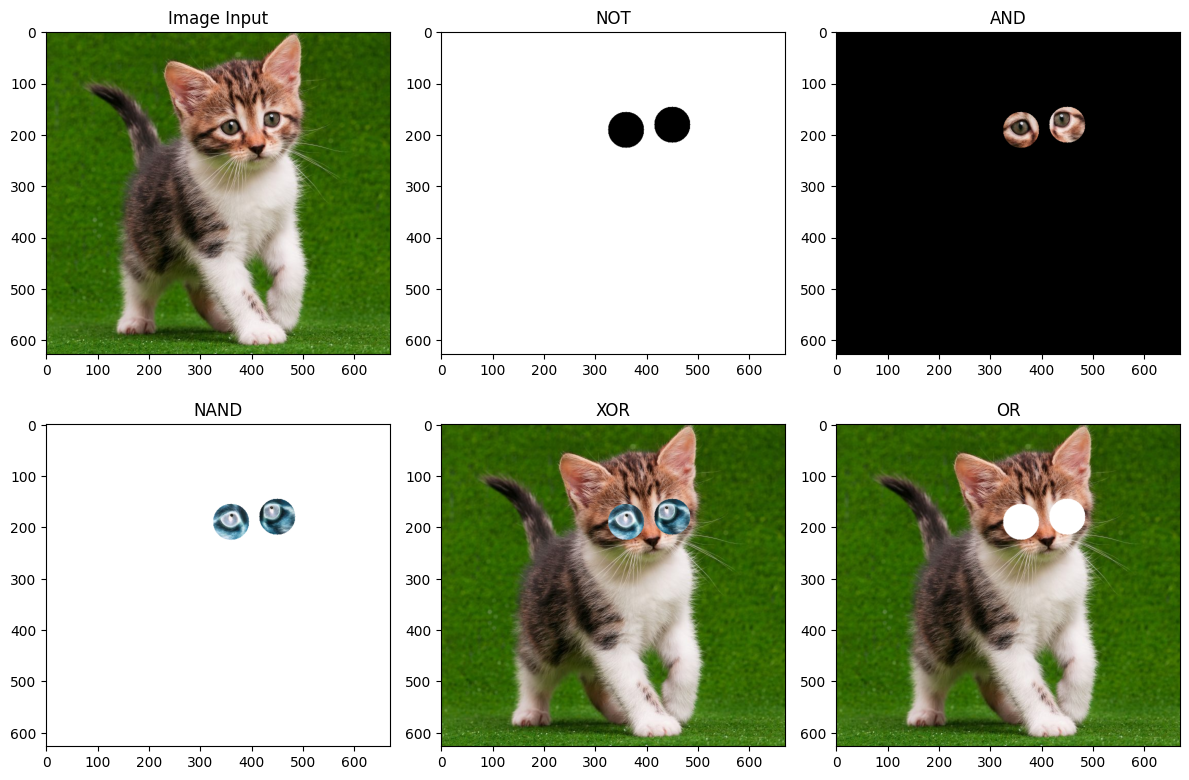

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load an image
image_path = '/content/drive/MyDrive/PCVK/kitten.jpg'
image = cv2.imread(image_path) # Load image in grayscale for simplicity

mask1 = np.zeros(image.shape, dtype=np.uint8)
# Create a mask (a binary mask, same size as the image)
mask = cv2.circle(mask1, (360, 190), 35, (255, 255, 255), -1) # Lingkaran pertama
mask = cv2.circle(mask1, (450, 180), 35, (255, 255, 255), -1)
# Apply bitwise NOT operation
bitwise_not = cv2.bitwise_not(mask)
# Apply bitwise NOT operation
bitwise_or = cv2.bitwise_or(image,mask)
# Apply bitwise AND operation
bitwise_and = cv2.bitwise_and(image, mask)
# Apply bitwise XOR operation
bitwise_xor = cv2.bitwise_xor(image, mask)
# Apply bitwise NAND operation (which is NOT AND)
bitwise_nand = cv2.bitwise_not(bitwise_and)

# Plot the results
images = [image, bitwise_not, bitwise_and, bitwise_nand, bitwise_xor,bitwise_or]
titles = ['Image Input' , 'NOT', 'AND', 'NAND', 'XOR','OR']
plt.figure(figsize=(12, 8))

for i in range(6):
 plt.subplot(2, 3, i+1)
 plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
 plt.title(titles[i])

plt.tight_layout()
plt.show()

**Gamma Correction**

Gamma correction adalah teknik yang digunakan untuk menyesuaikan kecerahan gambar berdasarkan karakteristik nonlinier dari perangkat output, seperti monitor. Jika nilai gamma lebih besar dari 1 (misalnya gamma = 3), gambar akan terlihat lebih gelap. Sebaliknya, jika gamma lebih kecil dari 1, gambar akan tampak lebih cerah. Fungsi ini sangat penting untuk memastikan gambar terlihat sesuai pada perangkat yang memiliki respons nonlinier terhadap intensitas cahaya.

**Image Depth**

Kedalaman bit gambar berpengaruh pada jumlah warna yang dapat ditampilkan. Misalnya, pada gambar 8-bit, terdapat 256 kemungkinan warna, sementara pada gambar 7-bit hanya ada 128 warna. Semakin kecil kedalaman bit, semakin sedikit gradasi warna yang bisa ditampilkan, sehingga detail gambar berkurang. Dalam beberapa aplikasi, seperti kompresi gambar, pengurangan kedalaman bit ini digunakan untuk mengurangi ukuran file dengan mengorbankan detail gambar.

**Average Denoising**

Teknik average denoising dilakukan dengan menghitung rata-rata dari banyak gambar yang memiliki noise. Dengan cara ini, pengaruh noise acak dapat diminimalisir, sehingga gambar yang dihasilkan menjadi lebih jelas.

**Image Masking**

Image masking adalah teknik yang digunakan untuk mengekstraksi informasi spesifik dari gambar atau untuk menyembunyikan bagian tertentu. Masking sering digunakan pada dokumen atau gambar identifikasi, seperti KTP, untuk melindungi informasi sensitif. Masking yang efektif dapat membuat bagian yang tidak diinginkan dari gambar menjadi transparan atau dihilangkan.

**Bitwise Operation**

Operasi bitwise adalah operasi logika yang diterapkan pada gambar biner:

1. NOT: Membalik setiap bit dalam gambar. Hasilnya adalah gambar negatif, di mana piksel hitam menjadi putih dan sebaliknya.
2. OR: Menggabungkan dua gambar dengan aturan logika OR. Area terang pada salah satu gambar akan diprioritaskan.
3. AND: Menghasilkan gambar di mana hanya piksel yang sama-sama terang pada kedua gambar yang dipertahankan. Ini digunakan untuk menemukan area yang tumpang tindih antara dua gambar.
4. NAND: Kebalikan dari operasi AND. Piksel yang sama-sama terang di dua gambar dihilangkan, menyisakan piksel lainnya.
XOR: Membandingkan dua gambar dan menghasilkan gambar yang hanya menunjukkan area yang berbeda. Jika piksel sama di kedua gambar, hasilnya adalah hitam. Operasi ini dapat digunakan untuk membandingkan dua gambar.